<a href="https://colab.research.google.com/github/MelAGndy/main/blob/main/MPG_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn import metrics

import pickle

In [ ]:
columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'name']

In [ ]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', na_values = ['NA', '?'], names = columns, delim_whitespace=True)

In [ ]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [ ]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [ ]:
data['cylinders'].max()

8

In [ ]:
data['horsepower'] = data['horsepower'].fillna(data['horsepower'].median())

In [ ]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [ ]:
numeric_list = data.select_dtypes(include=[np.number]).columns
data[numeric_list] = data[numeric_list].astype(np.float32)

In [ ]:
x = data[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']].values
y = data['mpg'].values

In [ ]:
type(y)

numpy.ndarray

In [ ]:
type(x)

numpy.ndarray

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 101)

In [ ]:
x_train = x_train.astype(np.float32)

In [ ]:
print(f'The shape of the data is: \nx_train: \t{x_train.shape} \nx_test: \t{x_test.shape} \ny_train: \t{y_train.shape} \ny_test: \t{y_test.shape}')

The shape of the data is: 
x_train: 	(318, 7) 
x_test: 	(80, 7) 
y_train: 	(318,) 
y_test: 	(80,)


In [ ]:
LinearRegression_model = LinearRegression()
DecisionTree_model = DecisionTreeRegressor()
RandomForest_model = RandomForestRegressor()
XGBRegressor_model = XGBRegressor()

In [ ]:
models = [LinearRegression_model, DecisionTree_model, RandomForest_model, XGBRegressor_model]
for model in models:
    model.fit(x_train, y_train)
    print(f'{model} is trained!')

LinearRegression() is trained!
DecisionTreeRegressor() is trained!
RandomForestRegressor() is trained!
[00:22:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor() is trained!


In [ ]:
accuracy_LinearRegression = LinearRegression_model.score(x_test, y_test)
accuracy_DecisionTree = DecisionTree_model.score(x_test, y_test)
accuracy_RandomForest = RandomForest_model.score(x_test, y_test)
accuracy_XGBoost = XGBRegressor_model.score(x_test, y_test)

In [ ]:
models = {'LinearRegression_model': accuracy_LinearRegression, 'DecisionTree_model': accuracy_DecisionTree, 'RandomForest_model': accuracy_RandomForest, 
          'XGBRegressor_model': accuracy_XGBoost}
for model, score in models.items():
    print(f'The accuracy score for the {model} is {round(score, 4)}')

The accuracy score for the LinearRegression_model is 0.8001
The accuracy score for the DecisionTree_model is 0.7184
The accuracy score for the RandomForest_model is 0.904
The accuracy score for the XGBRegressor_model is 0.9017


In [ ]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


In [ ]:
test_x = np.zeros((1, 7))
test_x

array([[0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
test_x = np.zeros((1, 7))

test_x[0, 0] = 8.0
test_x[0, 1] = 307.0
test_x[0, 2] = 130.0
test_x[0, 3] = 3504.0
test_x[0, 4] = 12.0
test_x[0, 5] = 70.0
test_x[0, 6] = 1.0
test_x

array([[8.000e+00, 3.070e+02, 1.300e+02, 3.504e+03, 1.200e+01, 7.000e+01,
        1.000e+00]])

In [ ]:
prediction = LinearRegression_model.predict(test_x)
round(float(prediction[0]), 2)

15.09

In [ ]:
models = [LinearRegression_model, DecisionTree_model, RandomForest_model, XGBRegressor_model]

In [ ]:
for model in models:
    prediction = model.predict(test_x)
    print(f'The model {model} predicts an mpg of {round(float(prediction[0]), 2)}')

The model LinearRegression() predicts an mpg of 15.09
The model DecisionTreeRegressor() predicts an mpg of 18.0
The model RandomForestRegressor() predicts an mpg of 17.17
The model XGBRegressor() predicts an mpg of 16.05


In [ ]:
model_file = '/content/drive/MyDrive/LaGuardia Classes/Fall Predictive Analytics/Projects/Project 1/'

In [ ]:
with open('pkl_file', 'wb') as file:
    model = pickle.dump(LinearRegression_model, file)

In [ ]:
with open('dtm_file', 'wb') as file:
    model = pickle.dump(DecisionTree_model, file)

## ANN Part

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
model = Sequential()
model.add(Dense(25, input_dim = x.shape[1], activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1))

In [ ]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [ ]:
monitor = EarlyStopping(monitor = 'val_loss', min_delta = 1e-3, patience = 5, verbose = 1, mode = 'auto', restore_best_weights = True)

In [ ]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), callbacks = [monitor], verbose = 2, epochs = 1000)

Epoch 1/1000
10/10 - 1s - loss: 2607.7483 - val_loss: 604.5176 - 1s/epoch - 101ms/step
Epoch 2/1000
10/10 - 0s - loss: 342.5299 - val_loss: 380.3713 - 59ms/epoch - 6ms/step
Epoch 3/1000
10/10 - 0s - loss: 425.5168 - val_loss: 286.0007 - 44ms/epoch - 4ms/step
Epoch 4/1000
10/10 - 0s - loss: 239.9058 - val_loss: 218.9885 - 42ms/epoch - 4ms/step
Epoch 5/1000
10/10 - 0s - loss: 231.8112 - val_loss: 233.3443 - 58ms/epoch - 6ms/step
Epoch 6/1000
10/10 - 0s - loss: 214.0113 - val_loss: 197.9445 - 57ms/epoch - 6ms/step
Epoch 7/1000
10/10 - 0s - loss: 207.6267 - val_loss: 195.4582 - 41ms/epoch - 4ms/step
Epoch 8/1000
10/10 - 0s - loss: 204.6405 - val_loss: 196.2676 - 45ms/epoch - 4ms/step
Epoch 9/1000
10/10 - 0s - loss: 199.3004 - val_loss: 190.8098 - 50ms/epoch - 5ms/step
Epoch 10/1000
10/10 - 0s - loss: 196.2802 - val_loss: 188.0391 - 67ms/epoch - 7ms/step
Epoch 11/1000
10/10 - 0s - loss: 195.5217 - val_loss: 184.1413 - 46ms/epoch - 5ms/step
Epoch 12/1000
10/10 - 0s - loss: 191.1657 - val_los

In [ ]:
prediction = model.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(prediction, y_test))
print(f'After training teh score is: {score}')

3/3 [==============================] - 0s 5ms/step
After training teh score is: 3.4807846546173096


In [ ]:
# Defining boundaries for the input data
 # List comprehension way
col = [x for x in data.columns if x not in ('mpg', 'name')]
# col

# Normal loop way
print('{')
for i, name in enumerate(col):
    print(f'"{name}":{{"min":{data[name].min()}, "max":{data[name].max()}}}{"," if i < (len(col)-1) else ""}')
print('}')

{
"cylinders":{"min":3.0, "max":8.0},
"displacement":{"min":68.0, "max":455.0},
"horsepower":{"min":46.0, "max":230.0},
"weight":{"min":1613.0, "max":5140.0},
"acceleration":{"min":8.0, "max":24.799999237060547},
"year":{"min":70.0, "max":82.0},
"origin":{"min":1.0, "max":3.0}
}


In [ ]:
model.save('mpg_model1.h5')

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                200       
                                                                 
 dense_1 (Dense)             (None, 10)                260       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 471
Trainable params: 471
Non-trainable params: 0
_________________________________________________________________


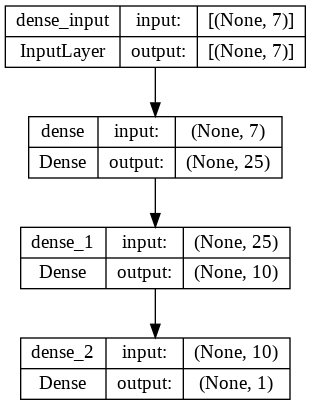

In [ ]:
from keras.utils import plot_model
plot_model(model, show_shapes=True)

In [ ]:
test_x = np.zeros((1, 7))

test_x[0, 0] = 8.0
test_x[0, 1] = 307.0
test_x[0, 2] = 130.0
test_x[0, 3] = 3200.0
test_x[0, 4] = 12.0
test_x[0, 5] = 70.0
test_x[0, 6] = 1.0
test_x

array([[8.00e+00, 3.07e+02, 1.30e+02, 3.20e+03, 1.20e+01, 7.00e+01,
        1.00e+00]])

In [ ]:
prediction = model.predict(test_x)
float(prediction[0])

1/1 [==============================] - 0s 18ms/step


15.628670692443848